# Using the sub-giant age catalogue from Xiang & Rix 2022, lets find Sausage stars and check their age distribution

In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LogNorm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/XianfRix-subgiants-galapot.fits'
tb = fits.open(path)
data = tb[1].data 


In [3]:
# parent mask to get good quality data
mask = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ecc_1']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)&(data['FEH']<-0.5)
print(len(data[mask]))


11336


# select Sausage stars based on orbits

In [4]:
# Feuillet way (high purity)
mask_ges_f = (np.abs(data['LZ'])<700)&(np.sqrt(data['actions'][:,0])>30)


In [5]:
print(len(data[mask&mask_ges_f]))

124


# Check to make sure they aren't in binaries by comparing the RVs of LAMOST with Gaia, APOGEE, and GALAH

I did this in the other notebook 

# Plot abundances of stars in the parent sample below 8 Gyr (without GES stars) to compare to GES samples

For the Feulliet sample

In [6]:
# 9 stars with a SNR cut of >80
mask_teff = (data['TEFF']<6500)
print(len(data['FEH'][mask&mask_ges_f&mask_teff]))
m = mask&mask_ges_f&mask_teff&(data['AGE']<8.6)
print(len(data[m]))

120
7


In [62]:
print(data['source_id_1'][m])

[ 751738058415860992 1884664845289850368 3398961492273398016
 3722209634435172864 3738962515150426880 3740473965681341440
 3920760165733793152]


In [68]:
np.savetxt('/Users/dhortadarrington/Desktop/ids_test', data['source_id_1'][m], fmt='%s')

(6500.0, 5400.0)

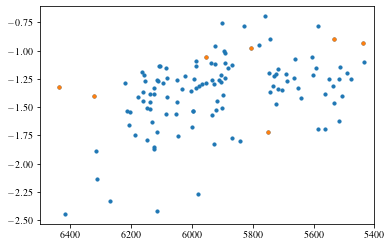

In [9]:
plt.scatter(data['TEFF'][mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff], s=10)
plt.scatter(data['TEFF'][m],data['FEH'][m], s=10)
plt.xlim(6500,5400)

In [ ]:
a = data['source_id_1'][m]

b = data['source_id_1'][mask&mask_ges_f&mask_teff][:10]


c = np.hstack((a,b))
print(len(np.unique(c)))
print(len(c))

In [ ]:
np.savetxt('/Users/dhortadarrington/Desktop/young-ges-subgiants.txt', c,fmt='%s')

In [ ]:
print(data['VLOS_ERR'][m])
print(data['VLOS_ERR'][m]/data['VLOS'][m])

In [ ]:
# Feuillet way (high purity)

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Selecting $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.1)

# E-Lz diagram
plt.subplot(1,2,1)
plt.hist2d(data['actions'][:,1][mask]/1e3,data['E_1'][mask]/1e5,bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,data['E_1'][mask&mask_ges_f]/1e5,s=70,c='violet',label='Feuillet definition',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Orbital Energy, E [$\times10^{5}$ km$^{2}$ s$^{-2}$]',fontsize=25)
plt.arrow(-1.8,-0.9,0.6,0,color='violet',head_width=0.035, head_length=0.2)
plt.text(-2.3,-0.925,'GES',color='violet',fontsize=25,fontweight='bold')

plt.arrow(-2.3,-1.4,0.2,0.05,color='k',head_width=0.035, head_length=0.2)
plt.text(-2.7,-1.45,'Disc',color='k',fontsize=25,fontweight='bold')

plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
# plt.ylim(-1,0.4)


plt.subplot(1,2,2)
plt.hist2d(data['actions'][:,1][mask]/1e3,np.sqrt(data['actions'][:,0][mask]),bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,np.sqrt(data['actions'][:,0][mask&mask_ges_f]),s=70,c='violet',label='F',edgecolors='rebeccapurple',rasterized=True)
plt.ylabel(r'Radial action, $\sqrt{J_R}$ [kpc km s$^{-1}$]',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
plt.ylim(0,80)

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/dynamic-selection-gala.pdf',dpi=200, bbox_inches = 'tight')


In [ ]:
# Feuillet way (high purity)

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Selecting $Gaia$-Enceladus/Sausage stars',fontsize=35,x=0.52,y=1.1)

# E-Lz diagram
plt.subplot(1,2,1)
plt.hist2d(data['actions'][:,1][mask]/1e3,data['E_1'][mask]/1e5,bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,data['E_1'][mask&mask_ges_f]/1e5,s=70,c='violet',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(data['actions'][:,1][m]/1e3,data['E_1'][m]/1e5,s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.ylabel(r'Orbital Energy, E [$\times10^{5}$ km$^{2}$ s$^{-2}$]',fontsize=25)
plt.arrow(-1.8,-0.9,0.6,0,color='violet',head_width=0.035, head_length=0.2)
plt.text(-2.3,-0.925,'GES',color='violet',fontsize=25,fontweight='bold')
plt.arrow(-2.3,-1.4,0.2,0.05,color='k',head_width=0.035, head_length=0.2)
plt.text(-2.7,-1.45,'Disc',color='k',fontsize=25,fontweight='bold')
plt.legend(frameon=False, fontsize=22,loc='upper left')

plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
# plt.ylim(-1,0.4)


plt.subplot(1,2,2)
plt.hist2d(data['actions'][:,1][mask]/1e3,np.sqrt(data['actions'][:,0][mask]),bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
plt.scatter(data['actions'][:,1][mask&mask_ges_f]/1e3,np.sqrt(data['actions'][:,0][mask&mask_ges_f]),s=70,c='violet',label='F',edgecolors='rebeccapurple',rasterized=True)
plt.scatter(data['actions'][:,1][m]/1e3,np.sqrt(data['actions'][:,0][m]),s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.ylabel(r'Radial action, $\sqrt{J_R}$ [kpc km s$^{-1}$]',fontsize=25)
plt.xlabel(r'Angular Momentum, $L_{z}$ [$\times10^{3}$ kpc km s$^{-1}$]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-3,2)
plt.ylim(0,80)

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/dynamic-selection-gala3.pdf',dpi=200, bbox_inches = 'tight')


# Randomly sample the age values within the uncertainties to get more robust age measurements

In [7]:
ges = mask&mask_ges_f&mask_teff
print(len(data[ges]))

120


In [8]:
percen_ages = np.percentile(data['AGE'][ges],[5,16,50,84,95])
print(percen_ages[0])
print(len(data[ges][data['AGE'][ges]<percen_ages[0]+0.03]))


8.569243097305298
7


In [ ]:
# n = 10000
# ages_samp = np.zeros((len(data['AGE']),n))

# for indx, i in tqdm.tqdm_notebook(enumerate(data['AGE'])):
#     ages_samp[indx] = np.random.normal(i, data['AGE_ERR'][indx], n)


In [9]:
# np.save('../sav/ages_samp.npy',ages_samp)
ages_samp = np.load('../sav/ages_samp.npy',allow_pickle=True)

In [10]:
# new ages
ages = np.nanmean(ages_samp,axis=1)
ages_err = np.nanstd(ages_samp,axis=1)


In [ ]:
# num_stars = []

# for indx, i in tqdm.tqdm_notebook(enumerate(ages_samp[ges].T)):
    
#     percentile_test = np.percentile(i,[5,16,50,84,95])
# #     num_stars.append(len(i[i<percentile_test[0]]))
#     num_stars.append(len(i[i<percentile_test[0]+0.03]))
    

In [ ]:
# np.save('../sav/num_stars.npy',num_stars)
num_stars = np.load('../sav/num_stars.npy',allow_pickle=True)

In [ ]:
# count how many times we get 6, 7, and 8 younger stars

print(len(np.where(np.array(num_stars)==6)[0]))
print(len(np.where(np.array(num_stars)==7)[0]))
print(len(np.where(np.array(num_stars)==8)[0]))

print(len(np.where(np.array(num_stars)==6)[0])/len(num_stars))
print(len(np.where(np.array(num_stars)==7)[0])/len(num_stars))
print(len(np.where(np.array(num_stars)==8)[0])/len(num_stars))

# Loop over x times and compute percentiles. Then figure out how many time there are outliers in the data

In [ ]:
# import tqdm
# t = 10000

# random_samps = np.zeros((t, len(data['AGE'][ges])))
# percen_random = np.zeros((t,5))

# for indx, i in tqdm.tqdm_notebook(enumerate(range(t))):
#     random_samps[indx] = np.random.choice(data['AGE'][ges], size=120, replace=True)
# #     percen_random[indx] = np.percentile(random_samps,[5,16,50,84,95],axis=0)
    

In [ ]:
# np.save('../sav/random_samps.npy',random_samps)
# np.save('../sav/percen_random.npy',percen_random)


In [ ]:
random_samps = np.load('../sav/random_samps.npy',allow_pickle=True)
# percen_random = np.load('../sav/percen_random.npy',allow_pickle=True)
print(np.shape(random_samps))

In [ ]:
percen_random = np.percentile(random_samps,[5,16,50,84,95],axis=1)
print(np.shape(percen_random))

In [ ]:
percen_ges_ages_original = np.percentile(data['AGE'][ges],[5,16,50,84,95])
print(percen_ges_ages_original)

In [ ]:
# outliers = []
# outliers_ids = []

# for indx, i in enumerate(random_samps):
#     outliers.append(len(i[i<percen_ges_ages_original[0]+0.03]))
#     outliers_ids.append(data['AGE'][ges][i<percen_ges_ages_original[0]+0.03])
    

In [ ]:
# np.save('../sav/outliers.npy',outliers)
outliers = np.load('../sav/outliers.npy',allow_pickle=True)


In [ ]:
plt.figure(facecolor='white')
plt.hist(outliers,100)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Number of outliers per loop from random sampling', fontsize=20)

plt.show()


In [ ]:
outliers = np.array(outliers)
print(len(outliers[outliers<3])/len(outliers))

In [ ]:
percen_ages = np.percentile(ages[ges],[5,16,50,84,95])
print('Median: '+str(percen_ages[2]))
print('Upper: '+str(percen_ages[3]-percen_ages[2]))
print('Lower: '+str(percen_ages[2]-percen_ages[1]))
print('Std: '+str((percen_ages[3]-percen_ages[1])/2))
print('5th percentile: '+str(percen_ages[0]))


# Plot the abundances and ages

In [23]:

# parent mask to get good quality data
mask_all = (data['AGE']>0)&(data['AGE']<14)&(data['SNR_G']>80)&(data['TEFF']>4000)&(data['TEFF']<7000)&(data['LOGG']>2.)&(data['LOGG']<5)&\
            (~np.isnan(data['ANGLE_PHI']))&(~np.isnan(data['LZ']))&(~np.isnan(data['ecc_1']))&(data['RUWE']<1.2)&\
            ((data['AGE_ERR']/data['AGE'])<0.1)
print(len(data[mask_all]))


53039


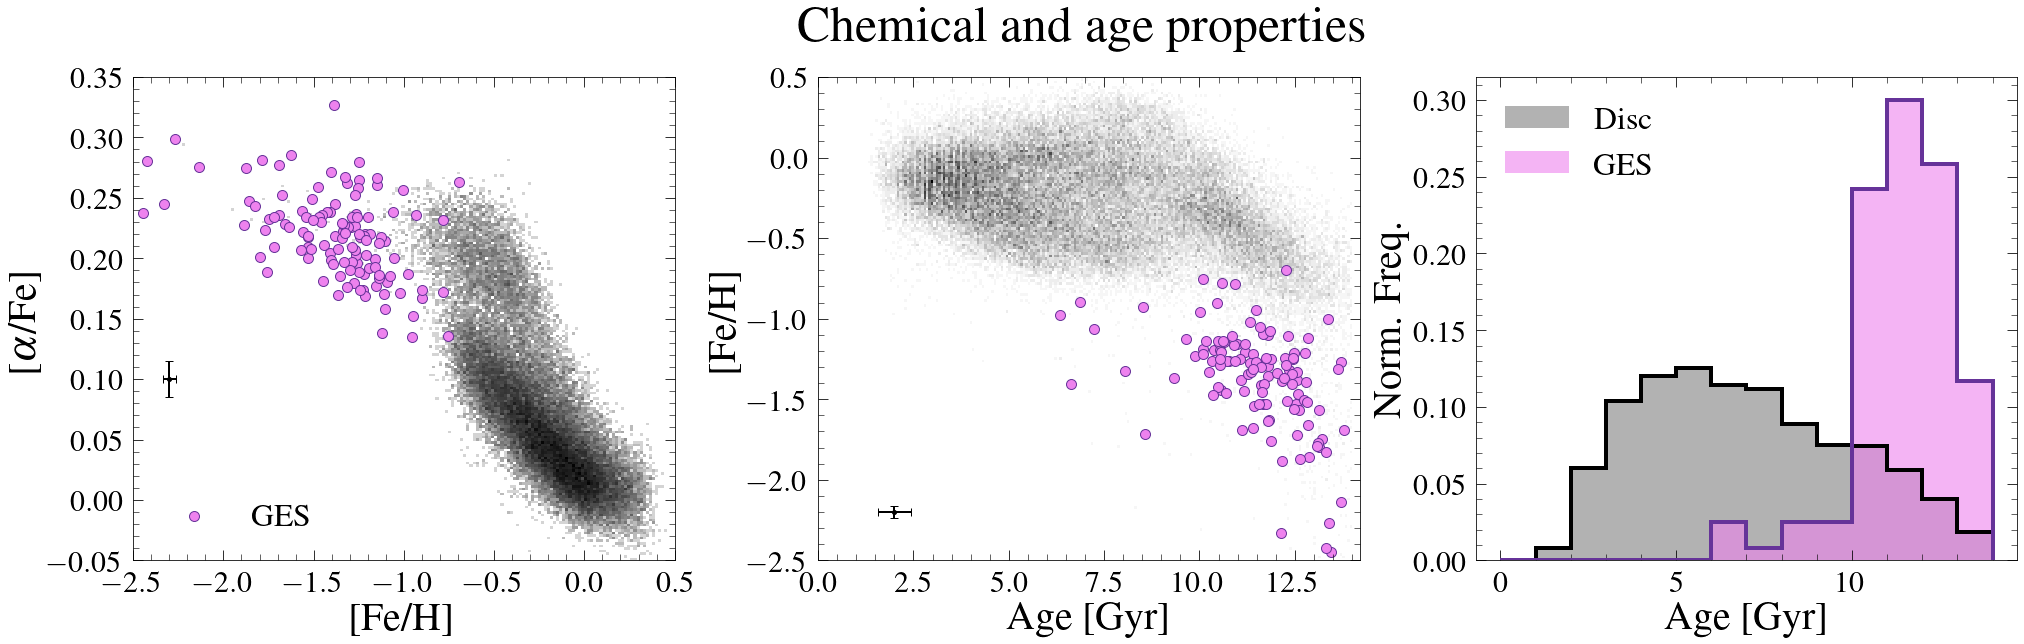

In [25]:
from matplotlib.colors import LogNorm
import cmasher as cm
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Chemical and age properties',fontsize=50,x=0.535,y=1.1)


plt.subplot(1,3,1)
plt.hist2d(data['FEH'][mask_all],data['ALPHA_FE'][mask_all],bins=200,cmap='binary',norm=LogNorm(),rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
plt.scatter(data['FEH'][mask&mask_ges_f&mask_teff],data['ALPHA_FE'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True, label='GES')
# plt.scatter(data['FEH'][m],data['ALPHA_FE'][m],s=250,c='dodgerblue',edgecolors='navy',label='GES, Age $<8.6$ Gyr')
plt.xlabel('[Fe/H]',fontsize=40)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=40)
plt.legend(frameon=False, fontsize=32,loc='lower left')
plt.xlim(-2.5,0.5)
plt.ylim(-0.05,0.35)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(-2.3,0.1, xerr = np.nanmean(data['FEH_ERR'][mask]),yerr=np.nanmean(data['ALPHA_FE_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

# cbar_ax = fig.add_axes([0.07, 0.3, 0.14,0.02])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r'Age [Gyr]',fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('bottom')
# cb.ax.xaxis.set_label_position('bottom')

plt.subplot(1,3,2)
plt.hist2d(ages[mask_all],data['FEH'][mask_all],bins=200,cmap='binary',rasterized=True)
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['AGE'][mask&mask_ges_f&mask_teff],data['FEH'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',rasterized=True)
# plt.scatter(ages[m],data['FEH'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.ylabel('[Fe/H]',fontsize=40)
plt.xlabel(r'Age [Gyr]',fontsize=40)
# plt.legend(frameon=False,fontsize=20)
plt.ylim(-2.5,0.5)
plt.xlim(0,14.2)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.errorbar(2,-2.2, xerr = np.nanmean(data['AGE_ERR'][mask]),yerr=np.nanmean(data['FEH_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

plt.subplot(1,3,3)
plt.hist(ages[mask_all],bins=np.linspace(0,14,15),histtype='step',lw=4,color='k',density=True)
plt.hist(ages[mask_all],bins=np.linspace(0,14,15),color='k',alpha=0.3,density=True, label='Disc')
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(ages[mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'GES')
plt.xlabel('Age [Gyr]',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=32)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-abundance-gala.pdf',dpi=400, bbox_inches = 'tight')



# and the Kiel diagram

In [ ]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Kiel diagram',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=ages[mask&mask_ges_f],vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.ylabel(r'Surface gravity, $\log(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.12, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(1,2,2)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['FEH'][mask&mask_ges_f],vmin=-2.5,vmax=-0.5,cmap=cm.toxic,edgecolors='darkgreen')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
# plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.61, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'[Fe/H]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/Kiel-gala.pdf',dpi=200, bbox_inches = 'tight')


In [ ]:
fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)
# fig.suptitle(r'Kiel diagram',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['AGE'][mask&mask_ges_f],vmin=0,vmax=14,cmap=cm.bubblegum,edgecolors='rebeccapurple', label='GES')
plt.scatter(data['TEFF'][m],data['LOGG'][m],s=250,c='dodgerblue',edgecolors='navy', label='GES, Age $<8.6$ Gyr')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.ylabel(r'Surface gravity, $\log(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.legend(frameon=False, fontsize=22,loc='upper left')
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.12, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Age [Gyr]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(1,2,2)
plt.hist2d(data['TEFF'][mask_all],data['LOGG'][mask_all],bins=200,cmap='binary')
# plt.scatter(data['FEH'][mask&mask_ges_ecc],data['ALPHA_FE'][mask&mask_ges_ecc],s=10,c='b',label='$e$ definition')
color = plt.scatter(data['TEFF'][mask&mask_ges_f],data['LOGG'][mask&mask_ges_f],s=70,c=data['FEH'][mask&mask_ges_f],vmin=-2.5,vmax=-0.5,cmap=cm.toxic,edgecolors='darkgreen')
plt.scatter(data['TEFF'][m],data['LOGG'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel(r'Effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=25)
# plt.ylabel(r'Surface gravity, $\log~(g)$',fontsize=25)
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7000,4500)
plt.ylim(4.5,3)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.61, 1.03, 0.3,0.04])
cb = plt.colorbar(color, cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'[Fe/H]',fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/Kiel-gala-2.pdf',dpi=200, bbox_inches = 'tight')


# Now you have a clean sample, look at these stars in dynamical space

In [ ]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Y'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Y'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Y [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['X'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['X'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('X [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(5,12.5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['Y'][mask&mask_ges_f&mask_teff],data['Z'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['Y'][m],data['Z'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('Y [kpc]',fontsize=25)
plt.ylabel('Z [kpc]',fontsize=25)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/positions.pdf',dpi=200, bbox_inches = 'tight')


In [ ]:
plt.figure(figsize=(30,7),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JPHI'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JPHI'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
# plt.ylim(-5,5)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.scatter(data['JR'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JR'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{r}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(5,12.5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['JPHI'][mask&mask_ges_f&mask_teff],data['JZ'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['JPHI'][m],data['JZ'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('J$_{\phi}$ [kpc km/s]',fontsize=25)
plt.ylabel('J$_{z}$ [kpc km/s]',fontsize=25)
# plt.xlim(-5,5)
plt.ylim(0,1000)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/actions.pdf',dpi=200, bbox_inches = 'tight')


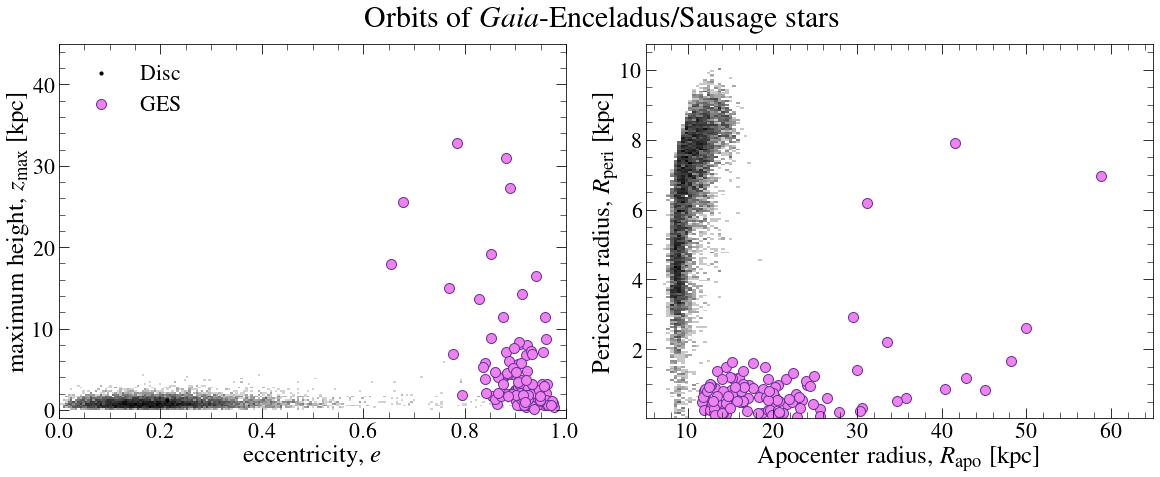

In [17]:
from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)

fig.suptitle(r'Orbits of $Gaia$-Enceladus/Sausage stars',fontsize=30,x=0.52,y=1.08)

plt.subplot(1,2,1)
plt.hist2d(data['ecc_1'][mask],data['z_max'][mask],label='Disc', cmap='binary', bins=200, norm=LogNorm())
plt.scatter(data['ecc_1'][mask][0],data['z_max'][mask][0],s=10,c='k',label='Disc')
plt.scatter(data['ecc_1'][mask&mask_ges_f&mask_teff],data['z_max'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
# plt.scatter(data['ecc_1'][m],data['z_max'][m],s=250,c='dodgerblue',edgecolors='navy',label='GES, Age $<8.6$ Gyr')
plt.xlabel('eccentricity, $e$',fontsize=25)
plt.ylabel('maximum height, $z_{\mathrm{max}}$ [kpc]',fontsize=25)
plt.xlim(0,1)
# plt.yscale('log')
plt.legend(frameon=False, fontsize=22,loc='upper left')
plt.ylim(-1,45)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=22,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,2,2)
plt.hist2d(data['r_apo_1'][mask],data['r_peri'][mask],label='Disc', cmap='binary', bins=200, norm=LogNorm())
plt.scatter(data['r_apo_1'][mask&mask_ges_f&mask_teff],data['r_peri'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
# plt.scatter(data['r_apo_1'][m],data['r_peri'][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('Apocenter radius, $R_{\mathrm{apo}}$ [kpc]',fontsize=25)
plt.ylabel('Pericenter radius, $R_{\mathrm{peri}}$ [kpc]',fontsize=25)
plt.xlim(5,65)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(-10,10)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=22,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/ecc-gala2.pdf',dpi=200, bbox_inches = 'tight')



In [18]:
#transform to cylindrical velocities
phi = np.arctan(data['xyz'][:,1]/data['xyz'][:,0])
vr = +data['vxyz'][:,0]*np.cos(phi)+data['vxyz'][:,1]*np.sin(phi)
vt = -data['vxyz'][:,0]*np.sin(phi)+data['vxyz'][:,1]*np.cos(phi)

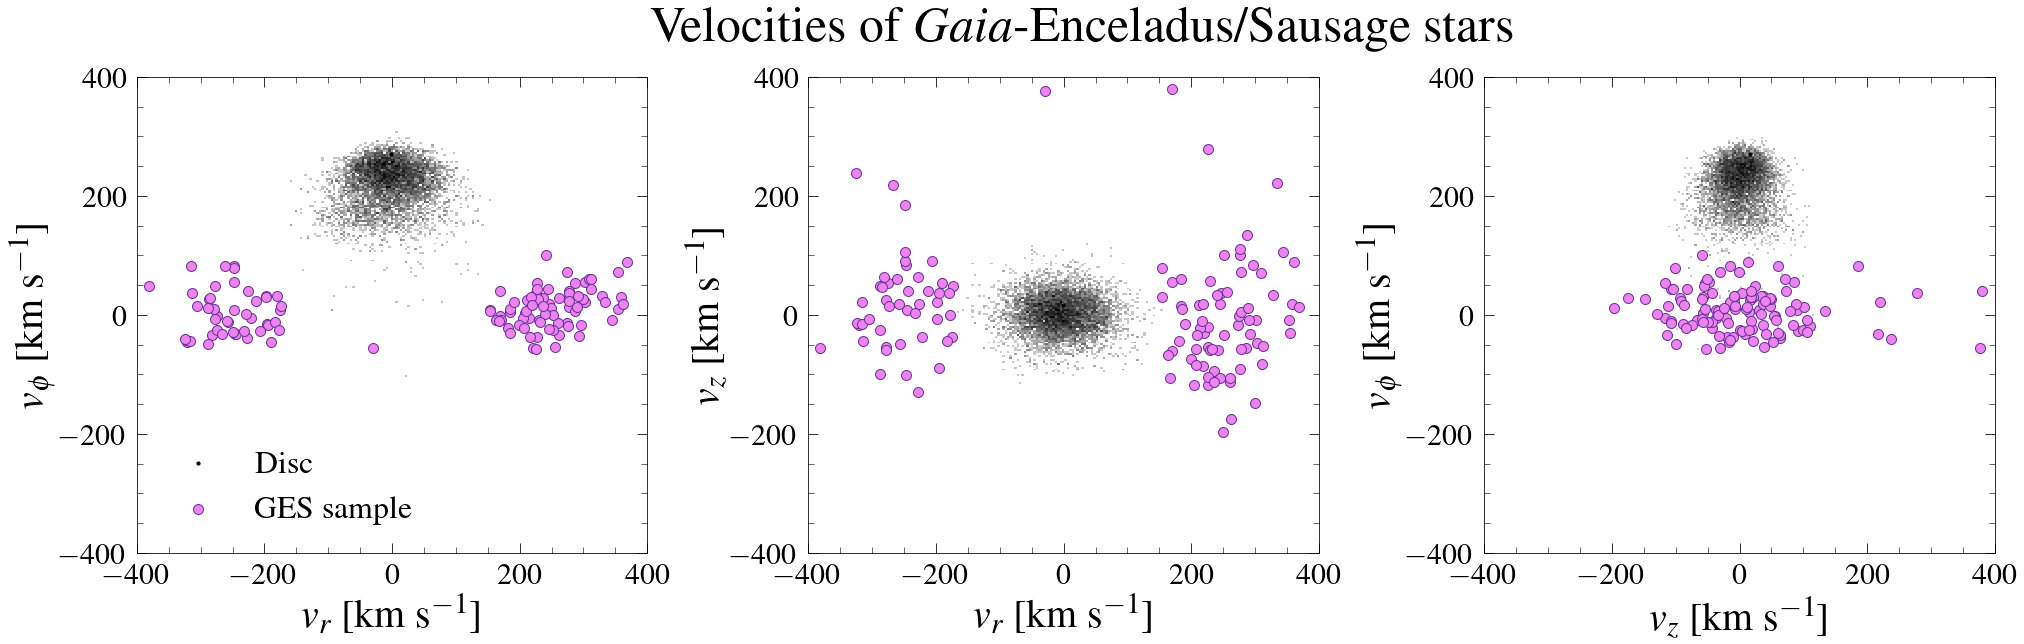

In [21]:
fig = plt.figure(figsize=(28,8),facecolor='white',constrained_layout=True)

fig.suptitle(r'Velocities of $Gaia$-Enceladus/Sausage stars',fontsize=50,x=0.535,y=1.1)

plt.subplot(1,3,1)
plt.hist2d(vr[mask],vt[mask],label='Disc', cmap='binary', bins=200, norm=LogNorm())
plt.scatter(vr[mask][0],vt[mask][0],s=10,c='k',label='Disc')
plt.scatter(vr[mask&mask_ges_f&mask_teff],vt[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES sample')
# plt.scatter(vr[m],vt[m],s=250,c='dodgerblue',edgecolors='navy',label='GES sample, Age $<8.6$ Gyr')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.legend(frameon=False, fontsize=32,loc='lower left')
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.hist2d(vr[mask],data['vxyz'][:,2][mask],label='Disc', cmap='binary', bins=200, norm=LogNorm())
plt.scatter(vr[mask][0],data['vxyz'][:,2][mask][0],s=10,c='k',label='Disc')
plt.scatter(vr[mask&mask_ges_f&mask_teff],data['vxyz'][:,2][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
# plt.scatter(vr[m],data['vxyz'][:,2][m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{r}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.hist2d(data['vxyz'][:,2][mask],vt[mask],label='Disc', cmap='binary', bins=200, norm=LogNorm())
plt.scatter(data['vxyz'][:,2][mask][0],vt[mask][0],s=10,c='k',label='Disc')
plt.scatter(data['vxyz'][:,2][mask&mask_ges_f&mask_teff],vt[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
# plt.scatter(data['vxyz'][:,2][m],vt[m],s=250,c='dodgerblue',edgecolors='navy')
plt.xlabel('$v_{z}$ [km s$^{-1}$]',fontsize=40)
plt.ylabel('$v_{\phi}$ [km s$^{-1}$]',fontsize=40)
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/velocities-gala.pdf',dpi=200, bbox_inches = 'tight')


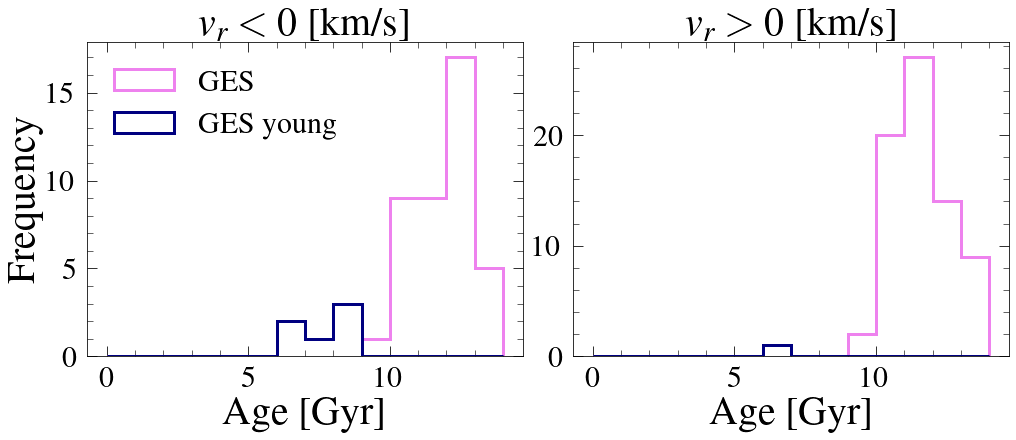

In [55]:
fig = plt.figure(figsize=(14,6),facecolor='white',constrained_layout=True)

plt.subplot(1,2,1)
plt.title('$v_{r} < 0$ [km/s]', fontsize=40)
plt.hist(data['AGE'][mask&mask_ges_f&mask_teff&(vr<0)], bins=np.linspace(0,14,15), histtype='step', lw=3, label='GES',color='violet' )
plt.hist(data['AGE'][m&(vr<0)], bins=np.linspace(0,14,15), histtype='step', lw=3, label='GES young', color='navy')
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlabel('Age [Gyr]',fontsize=40)
plt.ylabel('Frequency',fontsize=40)
plt.legend(loc='upper left', frameon=False, fontsize=30)


plt.subplot(1,2,2)
plt.title('$v_{r} > 0$ [km/s]', fontsize=40)
plt.hist(data['AGE'][mask&mask_ges_f&mask_teff&(vr>0)], bins=np.linspace(0,14,15), histtype='step', lw=3,color='violet')
plt.hist(data['AGE'][m&(vr>0)], bins=np.linspace(0,14,15), histtype='step', lw=3, color='navy')
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlabel('Age [Gyr]',fontsize=40)

plt.show()


# Now let's make some plots to ensure that the age determinations are robust

Check the spectroscopic and geometric M_K value. Unresolved binaries should appear off the 1-1 line here

In [ ]:
plt.scatter(data['MK_GEO'][mask&mask_ges_f&mask_teff],data['MK_SPEC'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MK_GEO'][m],data['MK_SPEC'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr')
plt.xlabel('M$_{k}$ geo',fontsize=25)
plt.ylabel('M$_{k}$ spec',fontsize=25)
plt.plot([1,4],[1,4],ls='dashed',color='k',lw=2)
plt.xlim(1,4)
plt.ylim(1,4)
plt.legend(frameon=False, fontsize=10,loc='upper left')
# plt.ylim(-1,30)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
fig = plt.figure(figsize=(7,5),facecolor='white',constrained_layout=True)
plt.scatter(data['MK_GEO'][mask], data['MK_GEO'][mask]-data['MK_SPEC'][mask],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(data['MK_GEO'][m], data['MK_GEO'][m]-data['MK_SPEC'][m],c='dodgerblue',edgecolors='navy',label='Age $<9$ Gyr',s=200)
plt.xlabel('M$_{K}$ geo',fontsize=25)
plt.ylabel('M$_{K}$ geo $-$ M$_{K}$ spec',fontsize=25)
plt.legend(frameon=False, fontsize=10,loc='upper left')




Check also the CMD

In [ ]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],data['GAIA_G'][mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],data['GAIA_G'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],data['GAIA_G'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'G',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(18,8)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [24]:
data['RGEO']

array([ 468.70853, 1009.6671 , 1909.737  , ..., 1464.6187 , 1381.2809 ,
       1428.5057 ], dtype=float32)

In [ ]:
m − M = −5 + 5 log10 d.

In [27]:
# values are from Gaia edr3
mags = data['GAIA_G'] - 5*(np.log10(data['RGEO']))+5
colour =  data['GAIA_BP'] -  data['GAIA_RP']
mask_g = (data['GAIA_G']>-100)& (data['RGEO']>0)&(data['GAIA_BP']>-100)&(data['GAIA_RP']>-100)


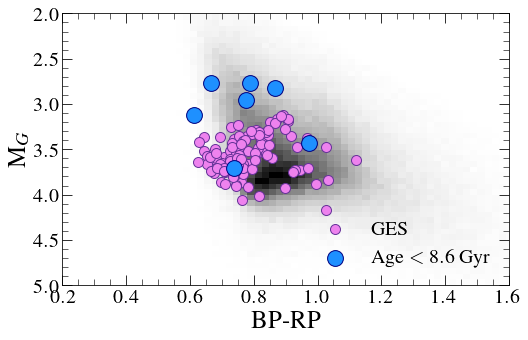

In [32]:
plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(colour[mask_g],mags[mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],mags[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],mags[m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('BP-RP',fontsize=25)
plt.ylabel(r'M$_{G}$',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='lower right')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(5,2)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
# plt.xlabel(r'$\mathrm{G}_{\mathrm{BP}} - \mathrm{G}_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


# Plot the M$_{K}$-$T_{\mathrm{eff}}$ with some isochrones

In [33]:
# mk = ((data['MK_GEO']/data['MK_GEO_ERR']**2)+(data['MK_SPEC']/data['MK_SPEC_ERR']**2))/\
#             (data['MK_GEO_ERR']**-2+data['MK_SPEC_ERR']**-2)

mk = data['MK_COMB']

In [34]:
# Yonsei-Yale isochrones for a star of metallicity and alpha closest to the mean of the GES debris

path_iso1 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-6Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso1 = fits.open(path_iso1)
diso_6 = tb_iso1[1].data 

path_iso2 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-8Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso2 = fits.open(path_iso2)
diso_8 = tb_iso2[1].data 

path_iso3 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-10Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso3 = fits.open(path_iso3)
diso_10 = tb_iso3[1].data 

path_iso4 = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/yy-iso-12Gyr-FEHminus1point5-alphaFe0point3.fits'
tb_iso4 = fits.open(path_iso4)
diso_12 = tb_iso4[1].data 


In [35]:
mag6 = 3.27 - diso_6['logL/Ls']/0.4
mag8 = 3.27 - diso_8['logL/Ls']/0.4
mag10 = 3.27 - diso_10['logL/Ls']/0.4
mag12 = 3.27 - diso_12['logL/Ls']/0.4

# 3.27 here is the value of M_K for the Sun (https://iopscience.iop.org/article/10.3847/1538-4365/aabfdf/pdf)

In [36]:
print(np.nanmean(data['PARALLAX_ERROR'][mask]))

0.01884080498658736


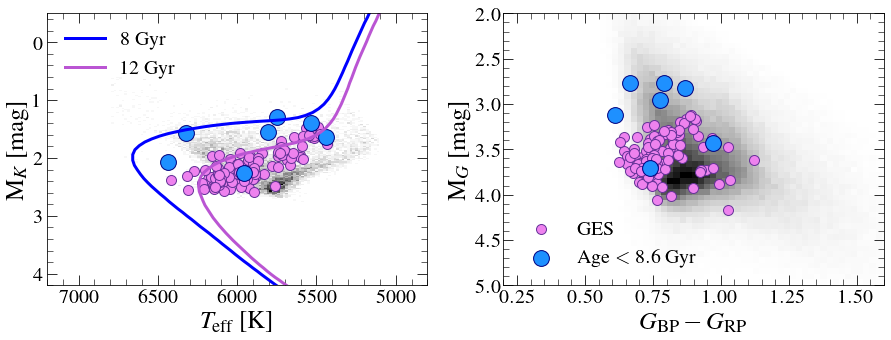

In [44]:
plt.figure(figsize=(15,5),facecolor='white')

plt.subplot(1,2,1)
plt.hist2d(data['TEFF'][mask],mk[mask],bins=100,cmap='binary')
plt.plot(10**diso_8['logT'], mag8,lw=3, ls='-', c='b',label='8 Gyr')
# plt.plot(10**diso_10['logT'], mag10,lw=3, ls='-', c='indigo',label='10 Gyr')
plt.plot(10**diso_12['logT'], mag12,lw=3, ls='-', c='mediumorchid',label='12 Gyr')
plt.scatter(data['TEFF'][mask&mask_ges_f&mask_teff],mk[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple')
plt.scatter(data['TEFF'][m],mk[m],s=250,c='dodgerblue',edgecolors='navy')
# plt.plot(10**diso_6['logT'], mag6,lw=2, c='dodgerblue',label='6 Gyr')

plt.xlabel('Teff',fontsize=25)
plt.ylabel(r'$M_{K}$',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(7200,4800)
plt.ylim(4.2,-0.5)
plt.ylabel(r'M$_{K}$ [mag]',fontsize=25)
plt.xlabel(r'$T_{\mathrm{eff}}$ [K]',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.errorbar(7000, 3.6, xerr = np.nanmean(data['TEFF_ERR'][mask]),yerr=np.nanmean(data['MK_COMB_ERR'][mask]), fmt="o",color='k', ms=4, capsize=4, lw=2, zorder=999)

plt.subplot(1,2,2)
plt.hist2d(colour[mask_g],mags[mask_g],bins=100,cmap='binary')
plt.scatter(colour[mask&mask_ges_f&mask_teff],mags[mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(colour[m],mags[m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.ylabel(r'M$_{G}$ [mag]',fontsize=25)
plt.legend(frameon=False, fontsize=20,loc='lower left')

# plt.xlim(0,20)
# plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,1.6)
plt.ylim(5,2)
# plt.ylabel(r'M$_{\mathrm{G}}$',fontsize=25)
plt.xlabel(r'$G_{\mathrm{BP}} - G_{\mathrm{RP}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/aging-the-sausage/plots/age-robustness-checks.pdf',dpi=200, bbox_inches = 'tight')



NOTE: the red lines in Fig 1 of XR22 correspond to a [Fe/H] of solar, this line shifts with metallicity

Check also the 2MASS colours

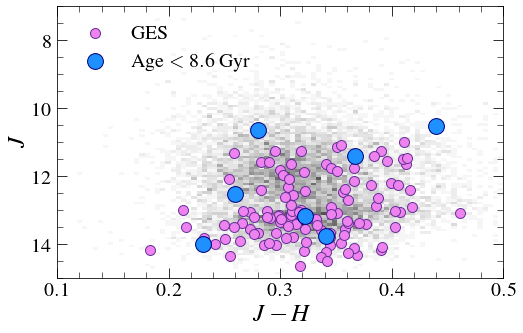

In [15]:
jh = data['J']- data['H']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jh[mask],data['J'][mask],bins=100,cmap='binary')
plt.scatter(jh[mask&mask_ges_f&mask_teff],data['J'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jh[m],data['J'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-H$',fontsize=25)
plt.ylabel(r'J',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.1,0.5)
plt.ylim(15,7)
plt.ylabel(r'$J$',fontsize=25)
plt.xlabel(r'$J-H$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

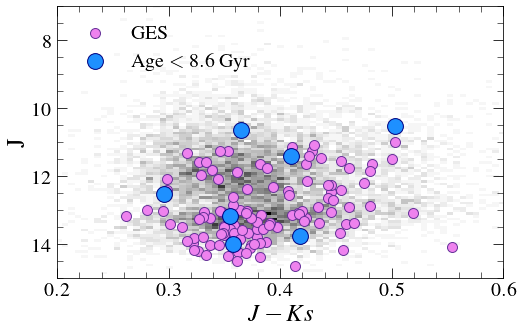

In [16]:
jk = data['J']- data['KS']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['J'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['J'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['J'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'J',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
plt.ylim(15,7)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

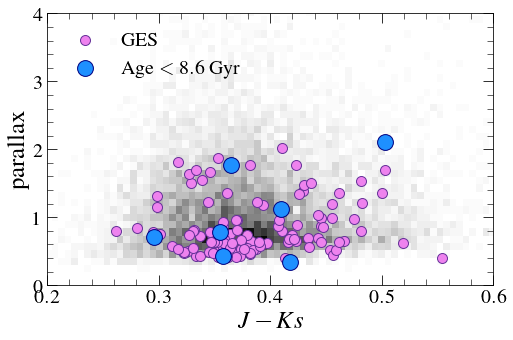

In [17]:
jk = data['J']- data['KS']

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['PARALLAX'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['PARALLAX'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['PARALLAX'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'parallax',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
plt.ylim(0,4)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

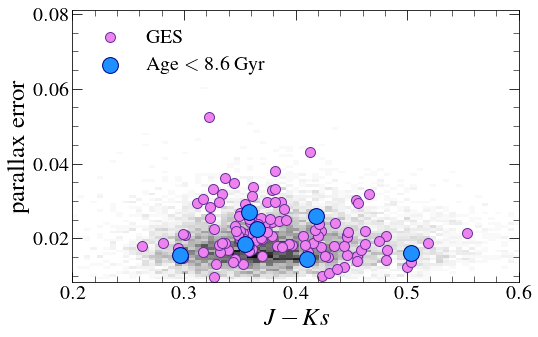

In [18]:

plt.figure(figsize=(8,5),facecolor='white')

plt.hist2d(jk[mask],data['PARALLAX_ERROR'][mask],bins=100,cmap='binary')
plt.scatter(jk[mask&mask_ges_f&mask_teff],data['PARALLAX_ERROR'][mask&mask_ges_f&mask_teff],s=100,c='violet',edgecolors='rebeccapurple',label='GES')
plt.scatter(jk[m],data['PARALLAX_ERROR'][m],s=250,c='dodgerblue',edgecolors='navy',label='Age $<8.6$ Gyr')
plt.xlabel('$J-Ks$',fontsize=25)
plt.ylabel(r'parallax error',fontsize=25)
# plt.xlim(0,20)
plt.legend(frameon=False, fontsize=20,loc='upper left')
# plt.legend(frameon=False,fontsize=20)
plt.xlim(0.2,0.6)
# plt.ylim(0,4)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

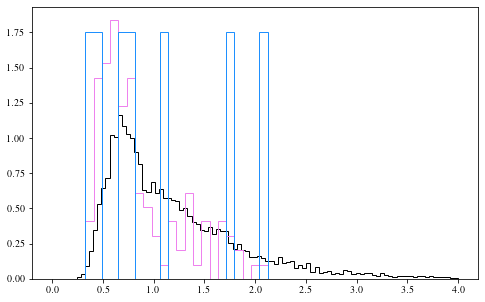

In [19]:

plt.figure(figsize=(8,5),facecolor='white')

plt.hist(data['PARALLAX'][mask], bins=np.linspace(0,4,100), density=True, color='k', histtype='step')
plt.hist(data['PARALLAX'][mask&mask_ges_f&mask_teff], bins=np.linspace(0,4,50), density=True, color='violet', histtype='step')
plt.hist(data['PARALLAX'][m], bins=np.linspace(0,4,50), density=True, color='dodgerblue', histtype='step')
plt.show()


# Save the sample so that it is easily available

In [ ]:
mascara = (np.abs(data['LZ'][mask])<700)&(np.sqrt(data['actions'][:,0][mask])>30)&(data['TEFF'][mask]<6500)
boo = np.tile('PARENT',len(data[mask]))
boo2 = np.tile('GES',len(data[mask][mascara]))
print(len(boo))
print(len(boo2))

In [ ]:
boo[mascara] = boo2


In [ ]:
from astropy.table import Table

source_id = data['source_id_1'][mask]
specid = data['SPECID'][mask]
# teff = data['TEFF']
# logg = data['LOGG']
# teff_err = data['TEFF_ERR']
# logg_err = data['LOGG_ERR']
# feh = data['FE_H']
# mgfe = data['MG_FE']
# feh_err = data['FE_H_ERR']
# mgfe_err = data['MG_FE_ERR']
boolean = boo

actions = data['actions'][mask]
zmax = data['z_max'][mask]
rperi = data['r_per'][mask]
rapo = data['r_apo_1'][mask]
ecc = data['ecc_1'][mask]
L = data['L'][mask]
energy = data['E_1'][mask]



t = Table([source_id, specid, actions, L, energy, rperi, rapo, zmax, ecc, boolean], \
          names=('gaia3_sourceid', 'specid', 'actions','L', 'energy', 'rperi', 'rapo', 'zmax', 'ecc', 'in_GES'))

savepath = '/Users/dhortadarrington/Documents/Projects/aging-the-sausage/dat/'
t.write(savepath+'subgiant-paper-orbits-gala22.fits', format='fits')



Check the extinction

In [ ]:
def getDust(G, bp, rp, ebv, maxnit=100):
    """
    Compute the Gaia extinctions assuming relations from Babusieux.
    Author: Sergey Koposov skoposov@cmu.edu
    Args:
        G (float): Gaia G mag.
        bp (float): Gaia BP mag.
        rp (float): Gaia RP mag.
        ebv (float): E(B-V), extinction in B-V.
        maxnit (int): number of iterations
    Returns:
        Extinction in G,bp, rp
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        curbp = curbp1

    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp




In [ ]:
AG, Abp, Arp = getDust(data['GAIA_G'], data['GAIA_BP'],data['GAIA_RP'],data['EBV'])


In [ ]:
plt.figure(figsize=(15,6),facecolor='white')

plt.subplot(1,3,1)
plt.hist(AG[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.hist(Abp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Abp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Abp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.hist(Arp[mask],bins=np.linspace(-0.3,1.8,100),histtype='step',color='k',label='All',density=True)
plt.hist(Arp[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
plt.hist(Arp[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'Norm. Freq.',fontsize=25)
plt.xlabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


In [ ]:
plt.scatter(AG[mask], Abp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Abp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Abp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{bp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
plt.scatter(AG[mask], Arp[mask],s=10,c='k')
plt.scatter(AG[mask&mask_ges_f&mask_teff], Arp[mask&mask_ges_f&mask_teff],s=100,c='violet')
plt.scatter(AG[m], Arp[m],s=100,c='dodgerblue')
# plt.hist(AG[mask&mask_ges_f&mask_teff],bins=np.linspace(-0.3,1.8,100),histtype='step',color='rebeccapurple',label='GES',density=True)
# plt.hist(AG[m],bins=np.linspace(-0.3,1.8,3),histtype='step',color='dodgerblue',label='Age $<9$ [Gyr]',density=True)
plt.ylabel(r'$A_{\mathrm{rp}}$',fontsize=25)
plt.xlabel(r'$A_{\mathrm{G}}$',fontsize=25)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# Check that these young stars are not lower SNR, or have high extinction

In [ ]:
plt.figure(figsize=(16,5),facecolor='white')

plt.subplot(1,2,1)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),histtype='step',lw=4,color='rebeccapurple',density=True)
plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,200,100),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),histtype='step',lw=4,color='navy',density=True)
plt.hist(data['SNR_G'][m],bins=np.linspace(0,200,100),color='b',alpha=0.6,density=True, label=r'young stars')


plt.xlabel('SNR',fontsize=40)
plt.legend(frameon=False,loc='upper left',fontsize=26)
plt.ylabel(r'Norm. Freq.',fontsize=40)
plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.ylim(0,0.14)

# plt.hist(1,2,2)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),histtype='step',lw=4,color='rebeccapurple',density=True)
# plt.hist(data['SNR_G'][mask&mask_ges_f&mask_teff],bins=np.linspace(0,14,15),color='violet',alpha=0.6,density=True, label=r'$Gaia$-Enceladus/Sausage')
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),histtype='step',lw=4,color='navy',density=True)
# plt.hist(data['SNR_G'][m],bins=np.linspace(0,14,15),color='b',alpha=0.6,density=True, label=r'young stars')


# plt.xlabel('SNR',fontsize=40)
# plt.legend(frameon=False,loc='upper left',fontsize=26)
# plt.ylabel(r'Norm. Freq.',fontsize=40)
# plt.tick_params(labelsize=22,direction='in',top=True,right=True,length=6,pad=10)
# plt.tick_params(which='major',labelsize=30,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()



# Find 5 doppelgangers for each young star that are old to then compare their spectra

Lucy did this